# Research on car sales ads report <a id='back'></a>
# Contents

* [Introduction](#intro)
* [Stage 1. Data Overview](#data_review)
* [Stage 2. Data Preprocessing](#data_preprocessing)
* [Stage 3. Calculation for new columns](#calculation)
* [Stage 4. Exploratory Data Analysis](#EDA)
* [Stage 5. Overall Conclusion](#conclusion)
* [Findings](#end)

# Introduction <a id='intro'></a>

- Hundreds of free advertisements for vehicles that are published on website every day were given by Crankshaft List. An analysis were conducted based on data collected over the last few years and determine which factors influence the price of a vehicle.

## Goals:

- To perform data cleaning based on the provided data set   
- To identify which factors influence the price of a vehicle

# Stage 1: Data Overview  <a id='data_review'></a>

In [42]:
!pip install missingno

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_column',None)
# Loading all the libraries required 

## Load data

In [44]:
df=pd.read_csv('/datasets/vehicles_us.csv')

In [45]:
df.info() # Explore the description about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


## Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [46]:
df.describe() 
# print the general/summary information about the DataFrame

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [47]:
df.head(10)
# print a sample of data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


<AxesSubplot:>

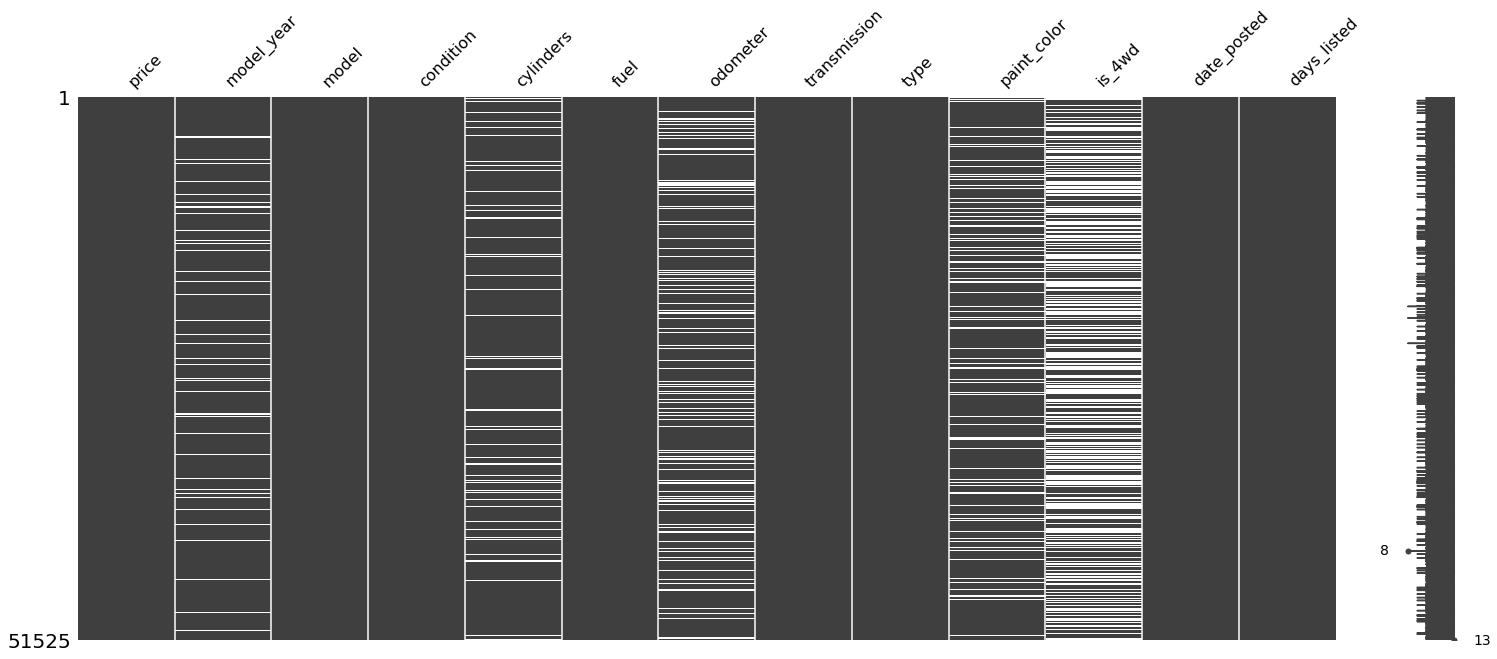

In [48]:
msno.matrix(df) # visualise which column had missing values

In [49]:
df.isna().sum() # identify which column had missing values

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Notes
- There was a total of 13 columns and 51525 rows in the dataset
- In the dataset of vehicle_us.csv, it can be found that there was missing values in the 'model_year', 'cylinders', 'odometer', 'paint_color' and 'is_4wd'.
- 'is_4wd' needs to be in boolean format instead of float64
- data_posted should be in the format of date/time instead of object format.
- The next step should be 'Preprocessing' step where data will be clean and missing values were replaced

# Stage 2: Preprocessing Treat missing values <a id='data_preprocessing'></a>

## Input missing values in the 'odometer' cell

In [50]:
df['odometer'].describe() # display numerical description of odometer cell

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

Note
- Due to high standard deviation, median will be used to fill the missing values , with the condition of the mileage filled was dependent on the model year and the condition of the car.

In [51]:
mileage_mapper = df.groupby(['model_year','condition'])['odometer'].median().to_dict()
# group df by model year and condition and calculate the median odometer readings

def odometer_fill(row):
    if np.isnan(row['odometer']):
        return mileage_mapper.get((row['model_year'], row['condition']))
        # returns median odometer value for the model year and condition which had missing values
    
    return row['odometer']

df['odometer']= df.apply(odometer_fill, axis=1)
# apply odometer_fill function to odometer column in dataset


df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      50969 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Notes
- For 'odometer', there was still 8 missing values

## Input missing values in the 'model_year' cell

In [52]:
df['model_year'].describe() # display numerical description of model_year cell

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

Notes
- For this part, the median will be used to fill the misssing values. The model year can be inferred from the model and condition. 

In [53]:
model_year_mapper = df.groupby(['model', 'condition'])['model_year'].median().to_dict()
# group df by model and condition and calculate the median model year readings

def model_year_fill(row):
    if np.isnan(row['model_year']):
        return mileage_mapper.get((row['model'], row['condition']))
    return row['model_year']
    # returns median model_year value for the model and condition which had missing values

df['model_year'] = df.apply(model_year_fill, axis=1)
# apply model_year_fill function to model_year column in dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      50969 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Notes
- For 'model_year', there was still 6 missing values

## Input missing values in the 'cylinders' cell

In [54]:
df['cylinders'].describe() # display numerical description of cylinders cell

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

Notes
- For this part, the median will be used to fill the misssing values. The cylinders can be inferred from the car model.

In [55]:
cylinder_mapper = df.groupby('model')['cylinders'].median().to_dict()
# group df by model and calculate the median cyliner readings

def cylinders_fill(row):#creates a function called cylinders_fill that takes a variable 'row' as argument
    if np.isnan(row['cylinders']):#if the value of cylinders is missing
        return mileage_mapper.get(row['model']) 
    return row['cylinders']
    # returns median cylinder value for the model which had missing values 
    
df['cylinders'] = df.apply(cylinders_fill, axis=1)
# apply cylinders_fill function to cylinders column in dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      50969 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Notes
- there was still no change at the 'cylinders' column

## Fix data types in the 'is_4wd' cell

In [56]:
df['is_4wd'].unique() # find the unique values in the 'is_4wd' cell

array([ 1., nan])

In [57]:
df['is_4wd']=df['is_4wd'].where(df['is_4wd'] == 1,0)
df['is_4wd']=df['is_4wd'].astype('bool')
# change the values into boolean format

df['is_4wd'].unique()

array([ True, False])

## Fix data types in the 'date_posted' cell

In [58]:
df['date_posted']= pd.to_datetime(df['date_posted'], format='%Y-%m-%d')
# changes data type from object to date/time format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      50969 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 4.8+ MB


<AxesSubplot:>

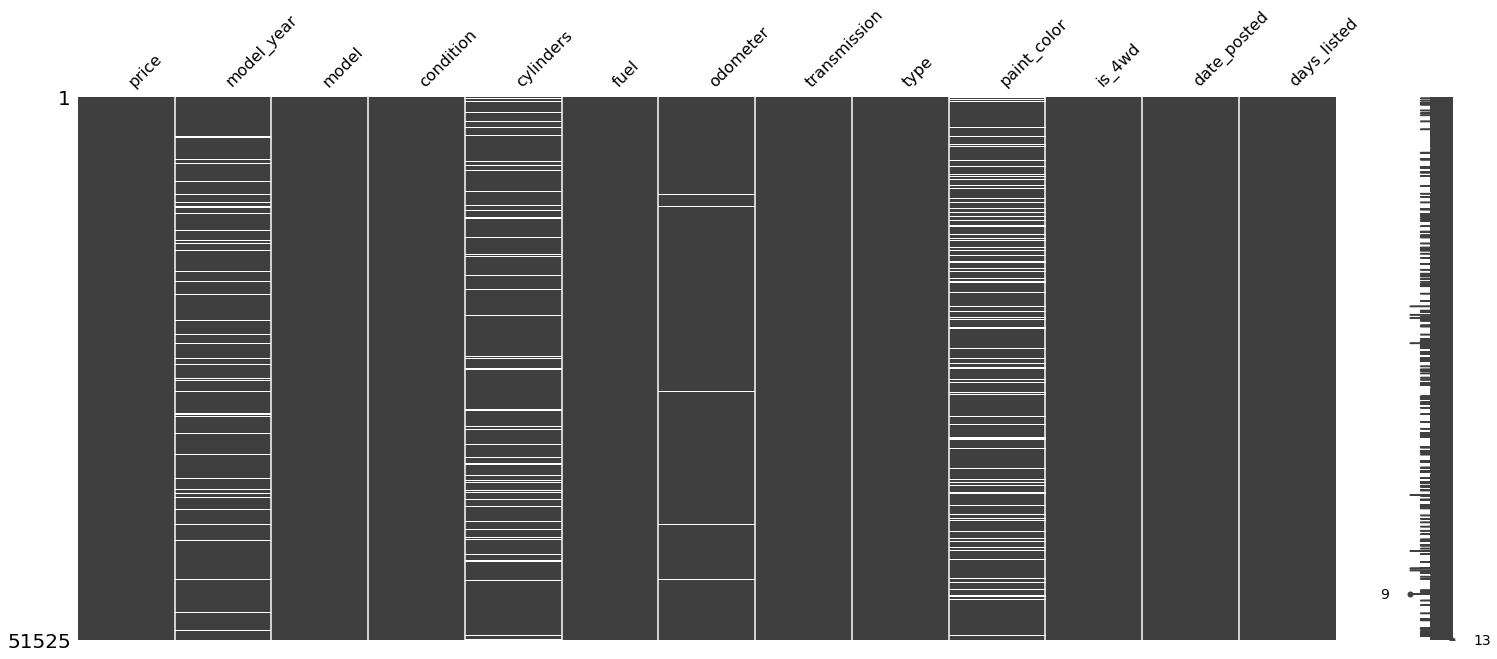

In [59]:
msno.matrix(df) # visualise which column had missing values

In [60]:
df.isna().sum() # identify which column had missing values

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer         556
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

## Input missing values in the 'paint_color' cell

- The NaN values will kept as that because this column is categorical. There is no other data which can be used as reference to fill the missing data.
- The NaN values of paint_color cell will not be deleted as it will seriously skewer the end results.


Conclusion

- The missing values in the odometer, model_year, and cylinders were filled with median values based on the corresponding related data to it. The NaN values in paint_color was kept as it is as removing NaN values will skewer the end results. 
- The data types in is_4wd and date_posted was changed to its appropriate types.


# Stage 3: Calculation for new columns <a id='calculation'></a>

- Additional factors such as datetime values for when the ad was placed, vehicle's age when the ad was places, vehicle's average mileage per year, and changing the values in the condition column. All these factors were added to visualise data more comprehensive.

## Datetime values for when the ad was placed

In [61]:
df['ad_weekday'] = df['date_posted'].dt.day_name()
# extracts the day from the date_posted values 

df['ad_month'] = df['date_posted'].dt.month_name()
# extracts the month from the date_posted values 

df['ad_year'] = df['date_posted'].dt.year
# extracts the year from the date_posted values 

df.head() #first five rows of dataframe
# Add datetime values for when the ad was placed

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_weekday,ad_month,ad_year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19,Saturday,June,2018
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019
3,1500,2003.0,ford f-150,fair,8.0,gas,193850.0,automatic,pickup,NaN,False,2019-03-22,9,Friday,March,2019
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019


## Vehicle's age when the ad was placed

In [62]:
df['age_posted'] = df['ad_year'] - df['model_year']
# subtracts the values of the model_year column from the values of the ad_year column 

df.head()#first five rows of dataframe

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_weekday,ad_month,ad_year,age_posted
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19,Saturday,June,2018,7.0
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,NaN
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6.0
3,1500,2003.0,ford f-150,fair,8.0,gas,193850.0,automatic,pickup,NaN,False,2019-03-22,9,Friday,March,2019,16.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2.0


## Vehicle's aeverage mileage per year

In [63]:
df['avg_yearly_mileage'] = df['odometer'] / df['age_posted']
# divides the 'odometer' values by the 'age_posted' values 

df.head()#first five rows of dataframe

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_weekday,ad_month,ad_year,age_posted,avg_yearly_mileage
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19,Saturday,June,2018,7.0,20714.285714
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,NaN,NaN
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,fair,8.0,gas,193850.0,automatic,pickup,NaN,False,2019-03-22,9,Friday,March,2019,16.0,12115.625000
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2.0,40451.500000


## Changing values in the 'condition' column

The values in the 'condition' column were manipulated into below values for easy visualisation:
- 'salvage' to 0
- 'fair' to 1, 
- 'good' to 2
- 'excellent' to 3
- 'like new' to 4
- 'new' to 5.

In [64]:
df['condition'] = df['condition'].where(df['condition'] != 'salvage', 0 )
# returns 0 if condition IS salvage 

df['condition'] = df['condition'].where(df['condition'] != 'fair', 1 )
# returns 1 if condition IS fair 

df['condition'] = df['condition'].where(df['condition'] != 'good', 2 )
# returns 2 if condition IS good 

df['condition'] = df['condition'].where(df['condition'] != 'excellent', 3)
# returns 3 if condition IS excellent 

df['condition'] = df['condition'].where(df['condition'] != 'like new', 4)
# returns 4 if condition IS like new 

df['condition'] = df['condition'].where(df['condition'] != 'new', 5 )
# returns 5 if condition IS new 

df['condition'] = df['condition'].astype('int')
# converts the data type to integer

df['condition'].unique()

array([2, 4, 1, 3, 0, 5])

Conclusion
- The ad_weekday, ad_month, ad_year, avg_yearly_mileage, and age_posted columns have been succesfully added and calculated. 'condition' values column also changed into its corresponding numbers

## Check clean data

In [65]:
df.info() # print the general/summary information about the DataFrame



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               51525 non-null  int64         
 1   model_year          47906 non-null  float64       
 2   model               51525 non-null  object        
 3   condition           51525 non-null  int64         
 4   cylinders           46265 non-null  float64       
 5   fuel                51525 non-null  object        
 6   odometer            50969 non-null  float64       
 7   transmission        51525 non-null  object        
 8   type                51525 non-null  object        
 9   paint_color         42258 non-null  object        
 10  is_4wd              51525 non-null  bool          
 11  date_posted         51525 non-null  datetime64[ns]
 12  days_listed         51525 non-null  int64         
 13  ad_weekday          51525 non-null  object    

In [90]:
df.head(10) # print a sample of data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_weekday,ad_month,ad_year,age_posted,avg_yearly_mileage
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19,Saturday,June,2018,7.0,20714.285714
1,25500,NaN,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,NaN,NaN
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,1,8.0,gas,193850.0,automatic,pickup,NaN,False,2019-03-22,9,Friday,March,2019,16.0,12115.625000
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2.0,40451.500000
5,14990,2014.0,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,Wednesday,June,2018,4.0,14488.500000
6,12990,2015.0,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,Thursday,December,2018,3.0,26404.000000
7,15990,2013.0,honda pilot,3,6.0,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,Monday,January,2019,6.0,18245.500000
8,11500,2012.0,kia sorento,3,4.0,gas,104174.0,automatic,SUV,NaN,True,2018-07-16,19,Monday,July,2018,6.0,17362.333333
9,9200,2008.0,honda pilot,3,NaN,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,Friday,February,2019,11.0,13381.000000


<AxesSubplot:>

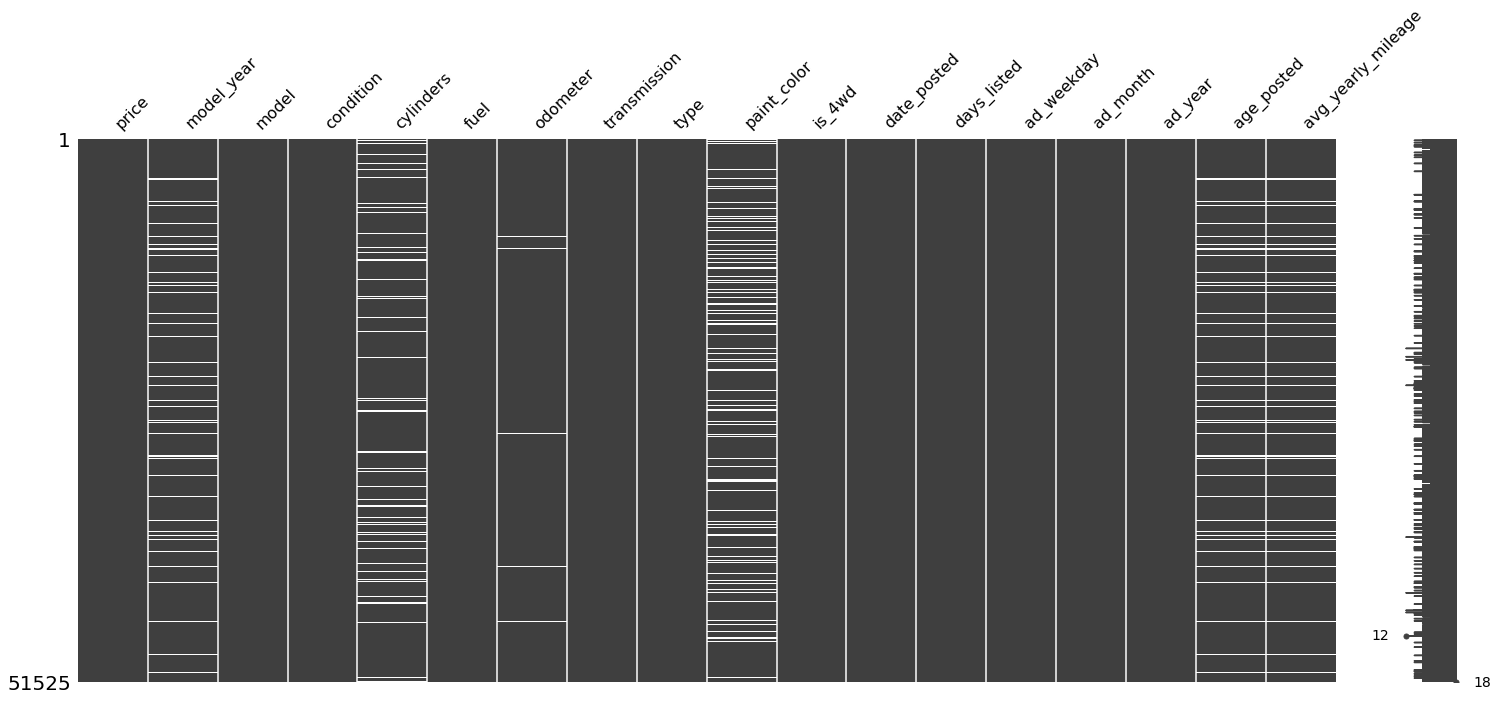

In [67]:
msno.matrix(df) # visualise which column had missing values

# Stage 4: Exploratory Data Analysis <a id='EDA'></a>

- The parameters of price, vehicle's age when the ad was placed, mileage, number of cylinders and condition were used and histograms were plotted for each parameter to study how outliers affect the form and readibility of the histograms.


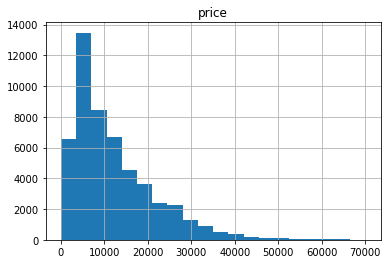

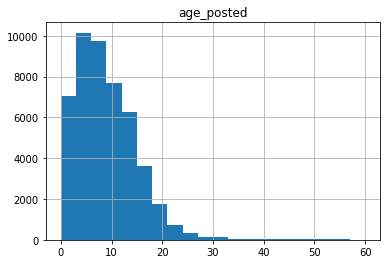

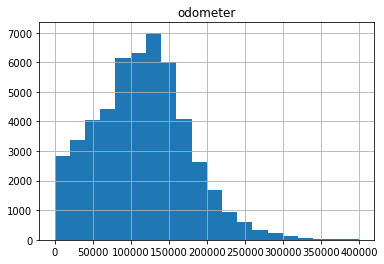

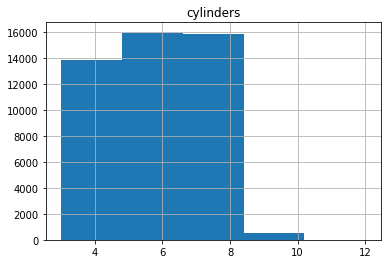

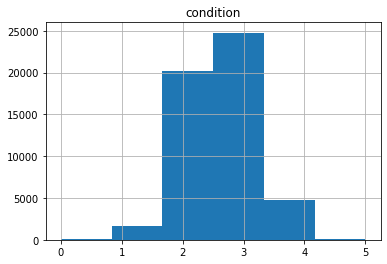

In [68]:
df['price'].hist(bins=20, range=(0, 70000))
#plots a histogram for the 'price' column with 20 bins and the x-axis ranging from 0 to 70000
plt.title('price')
plt.show()

df['age_posted'].hist(bins=20, range=(0, 60))
#plots a histogram for the 'age_posted' column with 20 bins and the x-axis ranging from 0 to 60
plt.title('age_posted')
plt.show()

df['odometer'].hist(bins=20, range=(0, 400000))
#plots a histogram for the 'odometer' column with 20 bins and the x-axis ranging from 0 to 400000
plt.title('odometer')
plt.show()

df['cylinders'].hist(bins=5)
#plots a histogram for the 'odometer' column with 5 bins
plt.title('cylinders')
plt.show()

df['condition'].hist(bins=6)
#plots a histogram for the 'condition' column with 6 bins
plt.title('condition')
plt.show()

Based on the observation on histogram for each parameters, it can be identified that:
 - price: the bins start zeroing out and forming a wide base after 40000
 - age_posted:the bins start zeroing out and forming a wide base after age of 30
 - odometer: a tail was formed after 250000
 - cylinders: no real outliers
 - condition: no real outliers

## Study and treat outliers

- At below, three set of data which contain outliers were separated into different dataframe

In [69]:
outlier_df=df.query('price>40000 & age_posted>30 & odometer>250000')
#a slice of data where the price is more than 40000, age is more than 30, and odometer is more than 250000 were created
outlier_df.info(verbose=True)
outlier_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 17869 to 17869
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               1 non-null      int64         
 1   model_year          1 non-null      float64       
 2   model               1 non-null      object        
 3   condition           1 non-null      int64         
 4   cylinders           0 non-null      float64       
 5   fuel                1 non-null      object        
 6   odometer            1 non-null      float64       
 7   transmission        1 non-null      object        
 8   type                1 non-null      object        
 9   paint_color         1 non-null      object        
 10  is_4wd              1 non-null      bool          
 11  date_posted         1 non-null      datetime64[ns]
 12  days_listed         1 non-null      int64         
 13  ad_weekday          1 non-null      object    

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_weekday,ad_month,ad_year,age_posted,avg_yearly_mileage
17869,59900,1964.0,chevrolet corvette,4,NaN,gas,990000.0,automatic,convertible,red,False,2018-06-17,28,Sunday,June,2018,54.0,18333.333333


- At below, a dataframe where the outliers are filtered out were created

In [70]:
filtered_df=df.query('price<40000 & age_posted<30 & odometer<250000')
#a slice of data where the price is less than 40000, age is less than 30, and odometer is less than 250000 were created
filtered_df.info(verbose=True)
filtered_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45806 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               45806 non-null  int64         
 1   model_year          45806 non-null  float64       
 2   model               45806 non-null  object        
 3   condition           45806 non-null  int64         
 4   cylinders           41125 non-null  float64       
 5   fuel                45806 non-null  object        
 6   odometer            45806 non-null  float64       
 7   transmission        45806 non-null  object        
 8   type                45806 non-null  object        
 9   paint_color         37547 non-null  object        
 10  is_4wd              45806 non-null  bool          
 11  date_posted         45806 non-null  datetime64[ns]
 12  days_listed         45806 non-null  int64         
 13  ad_weekday          45806 non-null  object    

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_weekday,ad_month,ad_year,age_posted,avg_yearly_mileage
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19,Saturday,June,2018,7.0,20714.285714
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,1,8.0,gas,193850.0,automatic,pickup,NaN,False,2019-03-22,9,Friday,March,2019,16.0,12115.625000
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2.0,40451.500000
5,14990,2014.0,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,Wednesday,June,2018,4.0,14488.500000


## Study core parameters without outliers

- The filtered data which without outliers were used to plot new histogram and compared with previous histogram

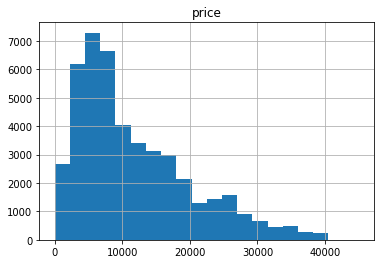

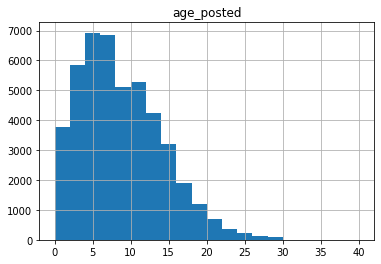

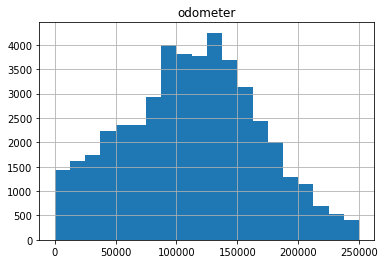

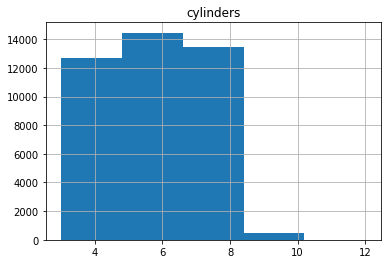

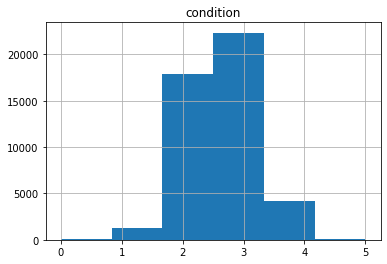

In [71]:
filtered_df['price'].hist(bins=20, range=(0, 45000))
plt.title('price')
plt.show()

filtered_df['age_posted'].hist(bins=20, range=(0, 40))
plt.title('age_posted')
plt.show()

filtered_df['odometer'].hist(bins=20)
plt.title('odometer')
plt.show()

filtered_df['cylinders'].hist(bins=5)
plt.title('cylinders')
plt.show()

filtered_df['condition'].hist(bins=6)
plt.title('condition')
plt.show()

From above update histogram, it can be mentioned that:
- 1) The new price is highest peak at 5000, then continue to has a steady decrease. Additionally, there is an increase peak around the value of 20000 to 30000.
- 2) The new age is highest peak at 5 followed by at 10, then continue to has a steady decrease.
- 3) The peak is around 125000 in the new odometer histogram followed by at 100000
- 4) The main difference that can be observed in the price, age_posted and odometer from filtered_data and between original data is that the newer histogram have more noise since they are dealing with more limited set of values. The peaks still the same but the tails are gone.

## Ads lifetime

- Find the mean and median of days_listed

In [72]:
filtered_df['days_listed'].describe() # describe the mean and median in days_Listed

count    45806.000000
mean        39.564795
std         28.219065
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

- The mean is about 39 days and median is 33 days.

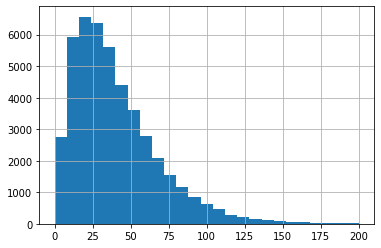

In [73]:
filtered_df['days_listed'].hist(bins=25, range=(0, 200))
plt.show()
# histogram of days_listed

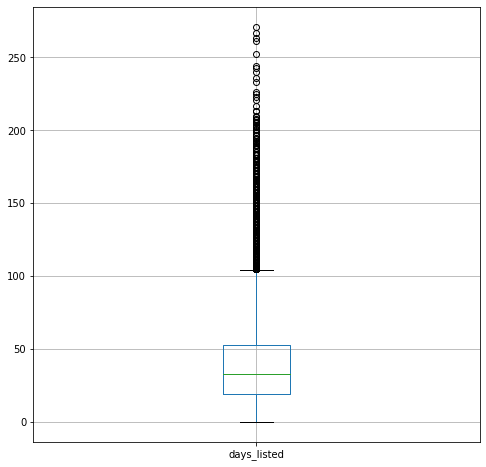

In [74]:
filtered_df.boxplot(column='days_listed', figsize=(8,8))
plt.show()

- Based on the plot box above, it can be deduced that a typical ad lasts aroudn between 20 and 50 days. Anything between 0 and 20 can be considered taken down too quick. Anything abnormally long would be over 100 days. 

## Average price per each type of vehicle

In [75]:
type_price=filtered_df.pivot_table(index='type', values='price', aggfunc='median')
type_price
# form a pivot table based on filtered data with 'type' as index and 'price' as values

,price
type,
SUV,8900
bus,10500
convertible,11000
coupe,12995
hatchback,5995
mini-van,6500
offroad,11850
other,8900
pickup,14900


In [76]:
type_ads=filtered_df['type'].value_counts()
type_ads
# form a data frame by using types as index and their individual counts as column values

SUV            11148
sedan          11147
truck          10750
pickup          6051
coupe           1943
wagon           1389
mini-van        1058
hatchback        944
van              579
convertible      359
other            222
offroad          192
bus               24
Name: type, dtype: int64

In [77]:
type_stat=type_price.join(type_ads) # join 2 tables to form a table
type_stat.columns= ['Price','Ads'] # rename columns
type_stat=type_stat.sort_values('Ads', ascending=False) # sorts values in descending order for ads
type_stat

,Price,Ads
type,,
SUV,8900,11148
sedan,5997,11147
truck,14995,10750
pickup,14900,6051
coupe,12995,1943
wagon,7900,1389
mini-van,6500,1058
hatchback,5995,944
van,7995,579


- From the above table, it can be stated that SUV and sedan are the most popular types of vehicle.

## Price factors

 - (A) SUV

In [83]:
suv_data = filtered_df.query('type == "SUV"') 
#forms a slice of rows where the type is SUV
suv_data = suv_data[['price', 'age_posted', 'odometer', 'condition', 'transmission', 'paint_color']]
#specifies the rows wanted in a new table
suv_data = suv_data.reset_index(drop=True)
#resets the index after slicing
suv_data.head() 
#first 5 rows of a new table

,price,age_posted,odometer,condition,transmission,paint_color
0,9400,7.0,145000.0,2,automatic,NaN
1,15990,6.0,109473.0,3,automatic,black
2,11500,6.0,104174.0,3,automatic,NaN
3,9200,11.0,147191.0,3,automatic,blue
4,12990,10.0,132285.0,3,automatic,black


- The above table used to study whether the price depends on age, mileage, condition, transmission type, and color.

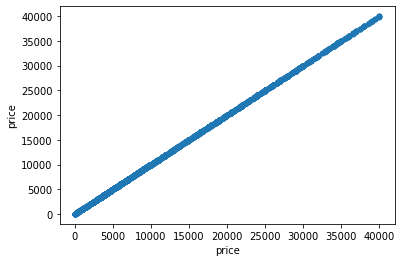

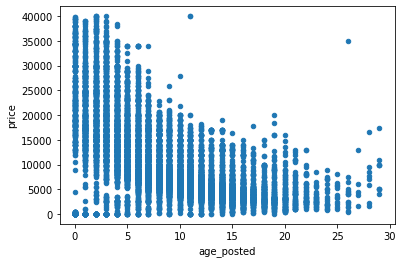

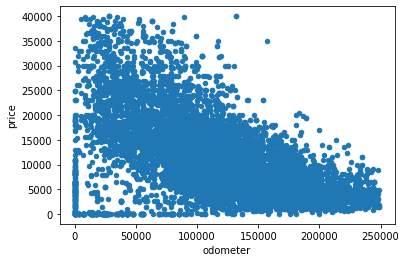

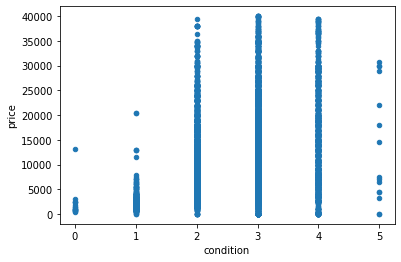

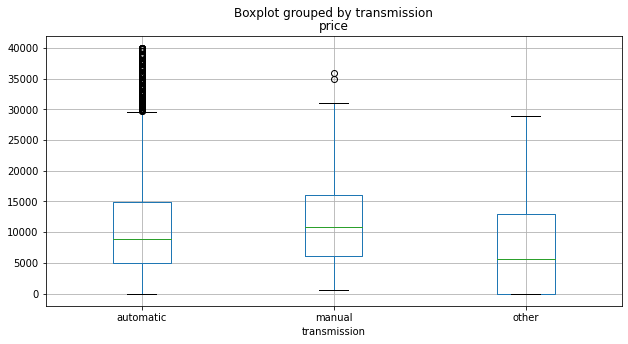

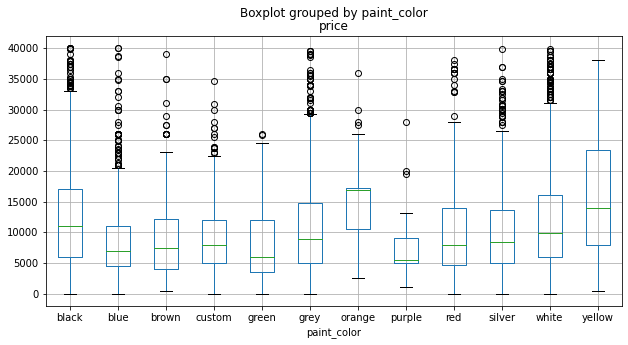

In [84]:
for col in suv_data.columns: #loops through the column names in the list of columns
    if (col == 'transmission')|(col == 'paint_color'):  #if the column is transmission or paint_color
        suv_data.boxplot(column='price', by=col, figsize=(10, 5))
        #forms a 10 by 5in, boxplot comparing it against the price 
        plt.show() #visualize the above diagram
        
    else: #for others
        suv_data.plot(x=col, y='price', kind='scatter')#forms a scatterplot comparing against price
        plt.show()#visualize the above diagram

In [85]:
suv_data.corr()#displays correlation matrix for the suv_data table

,price,age_posted,odometer,condition
price,1.000000,-0.595403,-0.536824,0.269194
age_posted,-0.595403,1.000000,0.641408,-0.323493
odometer,-0.536824,0.641408,1.000000,-0.342875
condition,0.269194,-0.323493,-0.342875,1.000000


- Above table shows a correlation matrix. A value closer to 1 or -1 shows a strong dependency, positive or negative. Closer to zero means there is little to no correlation or it can't be expressed in linear form

- Age emerges as the primary determinant affecting price, with odometer reading closely following suit, as indicated by the correlation matrix.
- The condition has little or no correlation or a correlation that can be expressed in linear form. 
- From the boxplots, manual transmission SUVs and yellow SUVs had higher typical prices in their respective categories. 

- (B) Sedan

In [87]:
sedan_data = filtered_df.query('type == "sedan"') 
#forms a slice of rows where the type is sedan
sedan_data = sedan_data[['price', 'age_posted', 'odometer', 'condition', 'transmission', 'paint_color']]
#specifies the rows wanted in a new table
sedan_data = sedan_data.reset_index(drop=True)
#resets the index after slicing
sedan_data.head() 
#first 5 rows of a new table

,price,age_posted,odometer,condition,transmission,paint_color
0,5500,6.0,110000.0,4,automatic,red
1,14900,2.0,80903.0,3,automatic,black
2,14990,4.0,57954.0,3,automatic,black
3,12990,3.0,79212.0,3,automatic,white
4,8990,7.0,111142.0,3,automatic,grey


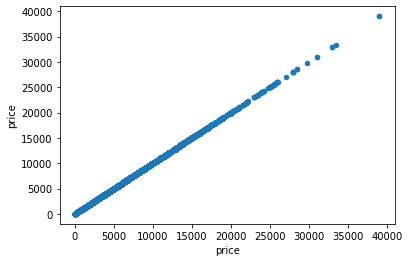

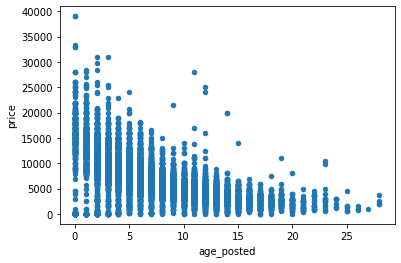

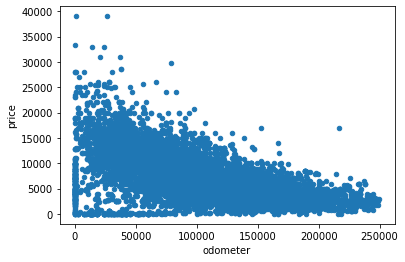

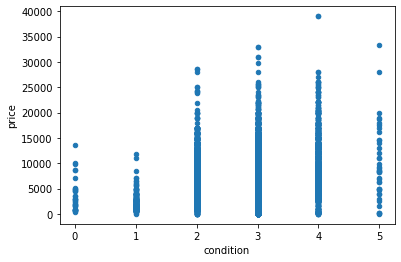

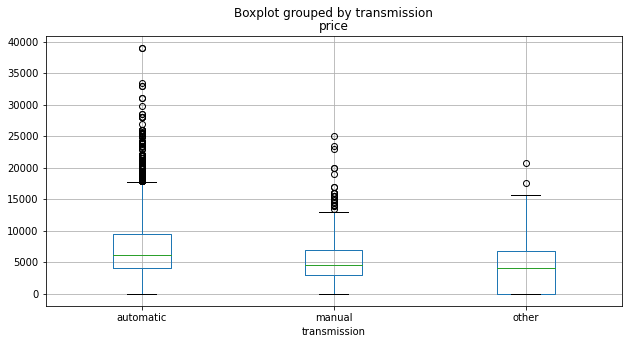

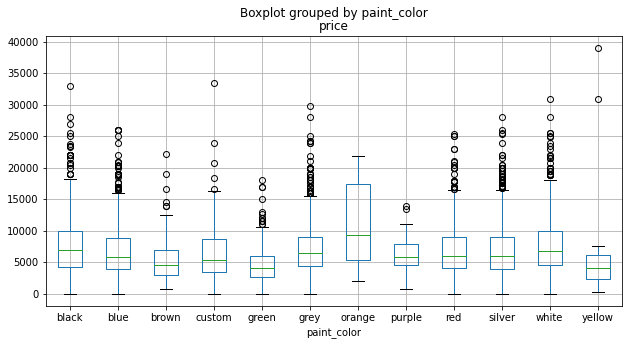

In [88]:
for col in sedan_data.columns: #loops through the column names in the list of columns
    if (col == 'transmission')|(col == 'paint_color'):  #if the column is transmission or paint_color
        sedan_data.boxplot(column='price', by=col, figsize=(10, 5))
        #forms a 10 by 5in, boxplot comparing it against the price 
        plt.show() #visualize the above diagram
        
    else: #for others
        sedan_data.plot(x=col, y='price', kind='scatter')#forms a scatterplot comparing against price
        plt.show()#visualize the above diagram

In [89]:
sedan_data.corr() #displays correlation matrix for the sedan_data table

,price,age_posted,odometer,condition
price,1.000000,-0.632892,-0.566062,0.291499
age_posted,-0.632892,1.000000,0.637483,-0.307002
odometer,-0.566062,0.637483,1.000000,-0.340936
condition,0.291499,-0.307002,-0.340936,1.000000


- The correlation matrix reaffirms that age remains the most influential factor affecting price, closely followed by odometer reading, both exhibiting negative correlations.
- Condition has little to no correlation with price, or a correlation that cannot be expressed linearly. 
- Inferences drawn from the box plots indicate that among sedans, those of orange color and with automatic transmission tend to command the highest typical prices within their respective categories.

# Stage 5: Overall conclusion <a id='conclusion'></a>

- Based on the original data set and filtered data, histograms were plotted to visualize the pattern of data set
- It can be observed that the typical ad lasts between 20 and 50 days, and those lasting more than 100 days are abnormally long.
- Two types of vehicles (sedan and SUV) with the highest number of ads were chosen to reate boxplots, scatterplots, and correlation matrices. From those graphs, it can be concluded that the factor that impacts price the most is age, followed by mileage.
- Additionally, observations revealed that among SUVs, yellow emerged as the color associated with the highest typical prices, while manual transmission surpasses automatic transmission in pricing.
- As for sedans, it was found that orange color contributed to higher typical prices, and automatic transmission was more prevalent compared to manual transmission.